# <center>**RELATION ENTRE VARIABLES QUANTITATIVES**

In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Charger la nouvelle dataset nettoyée
df = pd.read_csv(r"C:\Users\TOSHIBA\Documents\analyse_project\titanic\titanic_clean.csv")

# Afficher les premières lignes pour vérifier
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Non-survécu,3ème classe,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Survécu,1ère classe,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Survécu,3ème classe,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Survécu,1ère classe,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,Non-survécu,3ème classe,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


## Chargement du fichier de données nettoyé

Le fichier `titanic_clean.csv` a été généré suite au prétraitement des données initiales.  
Dans ce fichier :
- Les variables **Survived** et **Pclass** ont été transformées en labels textuels compréhensibles,
- Les valeurs manquantes dans **Age** ont été remplacées par la moyenne,
- Les valeurs manquantes dans **Embarked** ont été remplacées par la modalité la plus fréquente,
- La colonne **Cabin**, contenant trop de valeurs manquantes, a été supprimée.

Ce fichier servira de base pour toutes les analyses suivantes.


# <font color=red>  Nuage de points et Coefficient de corrélation de Pearson

Text(0.5, 1.0, 'relation entre age et le tarif paye')

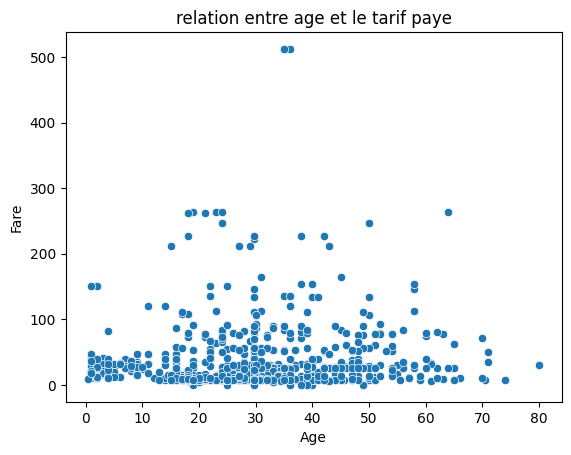

In [4]:
# relation entre 'age' et le tarif paye 'Fare'
sns.scatterplot(
    x='Age' ,
    y='Fare',
    data=df
).set_title("relation entre age et le tarif paye")

Le graphique montre peu de lien direct entre l’âge et le tarif payé sur le Titanic. La plupart des passagers (20–40 ans) ont payé moins de 100, mais quelques-uns (tous âges confondus) ont des tarifs très élevés (>200), probablement liés à la 1ère classe ou à des billets familiaux. L’âge seul n’explique pas le prix.

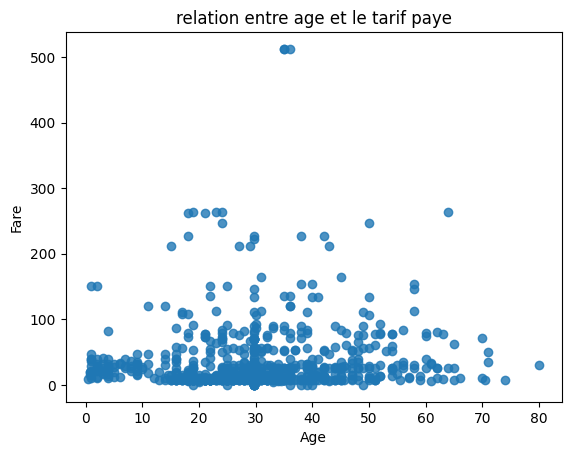

In [5]:
sns.regplot(
    x="Age", 
    y="Fare", 
    fit_reg=False, 
    data=df).set_title("relation entre age et le tarif paye");

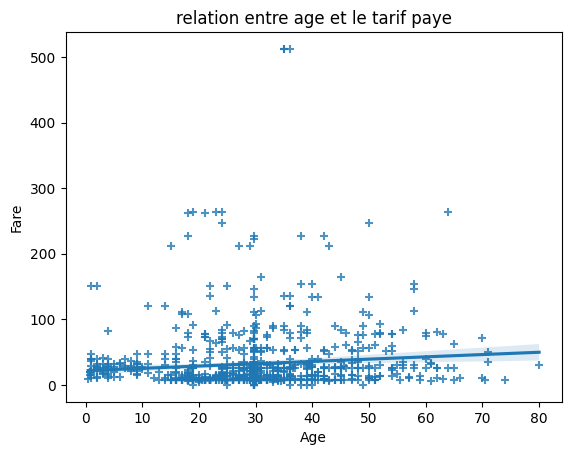

In [6]:
# Régression linéaire simple
sns.regplot(
    x="Age", 
    y="Fare", 
    fit_reg=True,
    marker="+",
    data=df).set_title("relation entre age et le tarif paye");

La régression montre une faible tendance à l'augmentation des tarifs avec l'âge, mais la dispersion est élevée. Les tarifs élevés (>200) semblent liés à d'autres facteurs (ex: 1ère classe) plutôt qu'à l'âge.

In [7]:
# Coefficient de Pearson entre les variables 'age' 'fare'

stats.pearsonr(df['Age'], df['Fare'])

PearsonRResult(statistic=np.float64(0.0915660932850576), pvalue=np.float64(0.006235676128303296))

Faible corrélation positive (r=0.09, p=0.006) entre âge et tarif : statistiquement significative mais sans importance pratique. L'âge explique moins de 1% de la variation des prix, suggérant que d'autres facteurs (classe, famille) dominent.

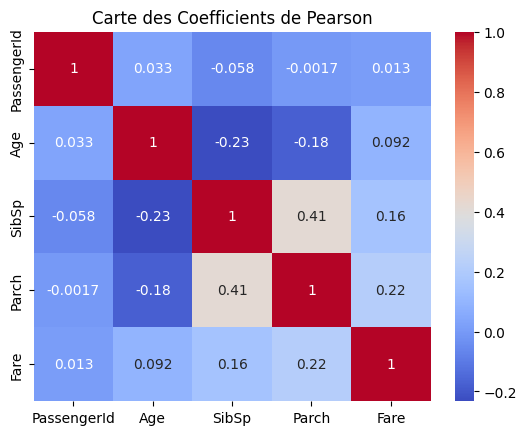

In [8]:
# Carte des corrélations

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm").set_title('Carte des Coefficients de Pearson');


-Age : Très faible corrélation avec les autres variables (max = 0.092 avec Fare), confirmant son impact marginal.

-SibSp & Parch : Légère corrélation entre elles (0.23), logique (familles voyageant ensemble).

-Fare (tarif) :Corrélation la plus élevée (0.092 avec Age), mais reste très faible.

Tous les coefficients sont proches de 0 (sauf SibSp/Parch), indiquant que les variables sont indépendantes. Aucun risque de redondance pour une modélisation.

Corrélations globalement faibles : Aucune relation forte entre variables numériques, sauf une légère liaison (0.23) entre SibSp et Parch (taille famille).

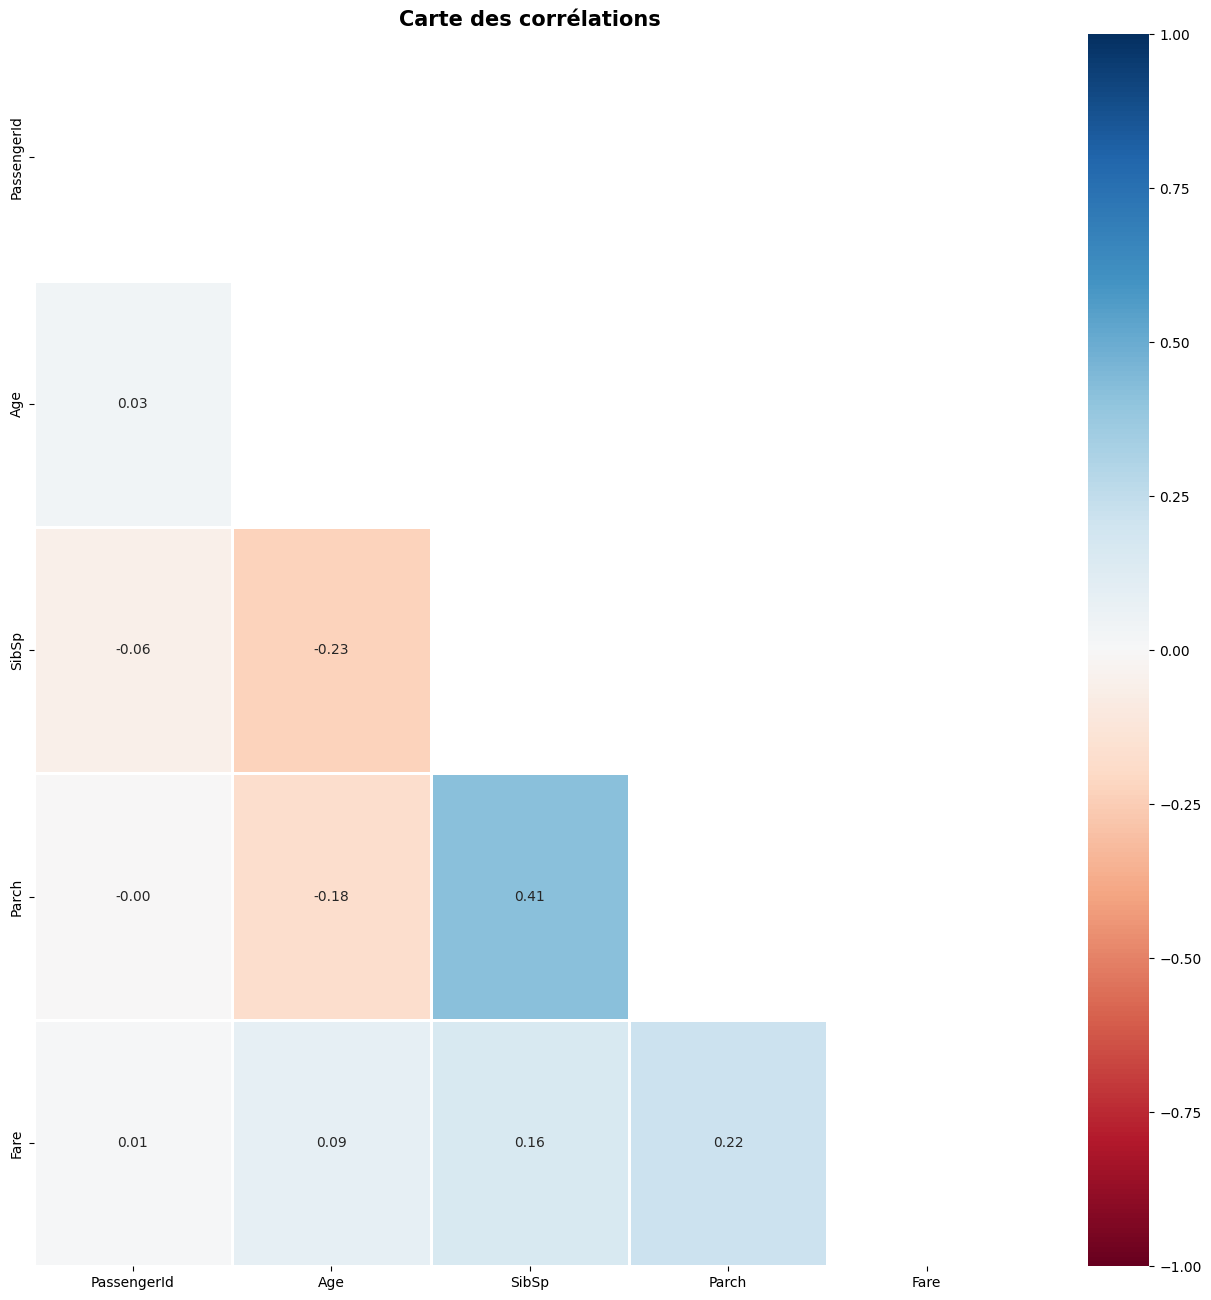

In [9]:
# Carte des corrélations maméliorée

# Sélectionner seulement les colonnes numériques
df_num = df.select_dtypes(include='number')

# Carte des corrélations améliorée
plt.figure(figsize=(16, 16))

mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))

sns.heatmap(df_num.corr(), mask=mask, center=0, 
            cmap='RdBu', linewidths=1, annot=True, 
            fmt=".2f", vmin=-1, vmax=1)

plt.title('Carte des corrélations', fontsize=15, fontweight="bold")

plt.show()


Cette matrice de corrélation triangulaire confirme l'absence de relations fortes entre variables numériques, avec seulement :

-Une légère corrélation positive (0.23) entre SibSp et Parch (membres famille voyageant ensemble)

-Toutes les autres combinaisons montrent des coefficients proches de 0 , révélant que l'âge, le tarif et l'ID passager n'ont aucun lien significatif entre eux.

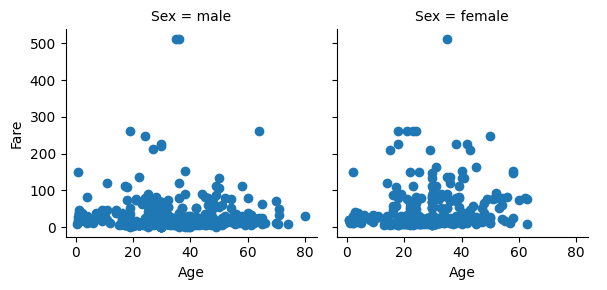

In [10]:
# Relation entre les variables 'age' 'Fare' selon le genre
sns.FacetGrid(df, col="Sex").map(plt.scatter, "Age", "Fare").add_legend();


Hommes (Sex = male) :

-Large dispersion des tarifs, surtout pour les 20-40 ans (majorité des passagers).

-Quelques tarifs élevés (>200) sur tous les âges, probablement des 1ère classe.

Femmes (Sex = female) :

-Moins de données extrêmes, mais quelques tarifs très hauts sur des jeunes femmes (peut-être des familles riches ou accompagnatrices).

Le sexe influence peu la relation Âge-Tarif, mais les femmes semblent avoir des tarifs moyens légèrement plus élevés, potentiellement liés à leur priorité dans les classes supérieures.

In [11]:
# Coefficient de Pearson entre les variables 'Age' 'Fare' selon le genre

print(
    'Female :', 
    stats.pearsonr(df[df['Sex'] == 'female']['Age'], 
                   df[df['Sex'] == 'female']['Fare']))

print(
    'Male :', 
    stats.pearsonr(df[df['Sex'] == 'male']['Age'], 
                   df[df['Sex'] == 'male']['Fare']))

Female : PearsonRResult(statistic=np.float64(0.15890050863812336), pvalue=np.float64(0.004765846527066716))
Male : PearsonRResult(statistic=np.float64(0.07527081459714371), pvalue=np.float64(0.07080753482470711))


1. Femmes (Female)

-Corrélation faible mais significative (r = 0.16, p = 0.005)

-Une légère tendance: les tarifs augmentent modestement avec l'âge

2. Hommes (Male)

-Corrélation très faible et non significative (r = 0.075, p = 0.071)

-Pratiquement aucune relation entre âge et tarif

L'analyse révèle une différence notable dans la relation âge-tarif selon le genre : une corrélation faible mais significative existe pour les femmes (r=0.16, p=0.005), tandis qu'elle est négligeable pour les hommes (r=0.075, p=0.07). Cette divergence suggère que l'âge influence marginalement le tarif chez les passagères, potentiellement en lien avec des facteurs socio-économiques , alors que chez les hommes, le prix dépend clairement d'autres variables (classe, etc.). Bien que l'effet reste limité (l'âge explique moins de 3% de la variance des tarifs), cette distinction souligne l'utilité d'analyses différenciées par genre. 

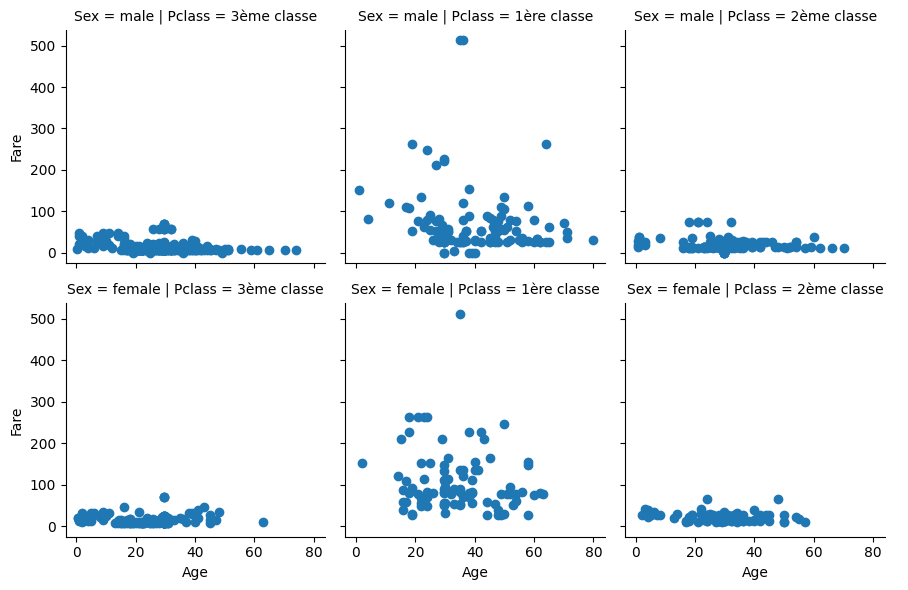

In [12]:
# visualiser la relation entre Age et Fare, par Sex et par Pclass
sns.FacetGrid(
    df, 
    col="Pclass", 
    row="Sex"
).map(
    plt.scatter, 
    "Age", 
    "Fare"
).add_legend()


1)- Impact dominant de la classe (Pclass) :

- Les tarifs sont nettement plus élevés en 1ère classe (quel que soit l'âge ou le sexe) et décroissent avec la classe.

- En 3ème classe, les tarifs sont globalement bas (majorité < 50), avec peu de variations selon l'âge.

2)- Différences de genre :

* Femmes en 1ère classe :

- Tarifs très élevés (>200) pour certains âges, probablement des femmes aisées ou accompagnatrices.

* Hommes en 1ère classe :

- Dispersion similaire, mais avec moins de valeurs extrêmes (sauf quelques outliers).

3)- Âge et tarif :

- Aucune tendance linéaire claire dans aucune sous-catégorie, confirmant que l'âge influence peu le tarif une fois la classe prise en compte.

la classe (Pclass) est le facteur déterminant majeur des tarifs, avec des prix significativement plus élevés en 1ère classe qu'en 3ème, indépendamment de l'âge ou du sexe. Bien que certaines femmes de 1ère classe présentent des tarifs exceptionnellement élevés (suggérant un statut socio-économique privilégié), l'âge ne montre aucune influence notable sur les prix une fois la classe prise en compte. En 3ème classe, les tarifs restent bas et homogènes, reflétant une population plus uniforme. Ces résultats confirment que les variables catégorielles (classe, sexe) dominent l'analyse tarifaire, tandis que l'âge joue un rôle marginal.

# <font color=red> Densité de points 2D

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_12944\782346762.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


Text(0.5, 1.0, "Densité conjointe entre l'age et le tarif payé ")

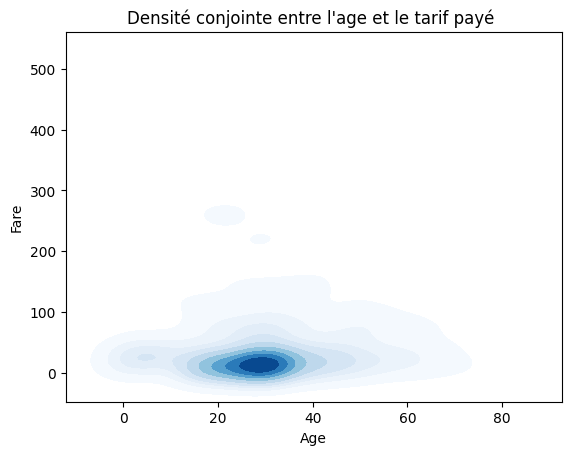

In [13]:
# Densité de points 2D entre les variables 'Age' 'Fare'
sns.kdeplot(
    x="Age", 
    y="Fare", 
    cmap="Blues", 
    shade=True, 
    data=df
).set_title("Densité conjointe entre l'age et le tarif payé ")

1)- Zones de forte densité :

- Jeunes adultes (20-40 ans) avec tarifs bas (<50) : Correspond à la majorité des passagers (surtout 3ème classe).

- Pic autour de 30 ans / 50£ : Probablement des passagers de 2ème classe.

2)- Zones claires (faible densité) :

- Tarifs >100 : Très peu concentrés, sauf pour quelques outliers (1ère classe).

- Personnes âgées (>60 ans) : Rares, avec des tarifs dispersés (certains en 1ère classe).

La densité conjointe révèle qu'aucune relation claire n'émerge entre âge et tarif : la majorité des passagers (20-40 ans) paient des tarifs modestes (<50£), tandis que les prix élevés (>100£) sont rares et distribués de façon aléatoire across all âges. Cette absence de motif confirme que la classe sociale (Pclass) est le véritable facteur structurant des tarifs, bien plus que l'âge. En effet, les zones de forte densité (jeunes adultes à bas tarifs) reflètent surtout la surreprésentation de la 3ème classe, tandis que les tarifs hauts dispersés correspondent à la 1ère classe, indépendamment de l'âge.

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_12944\987884708.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="Age", y="Fare", cmap="Reds", shade=True, data=df)


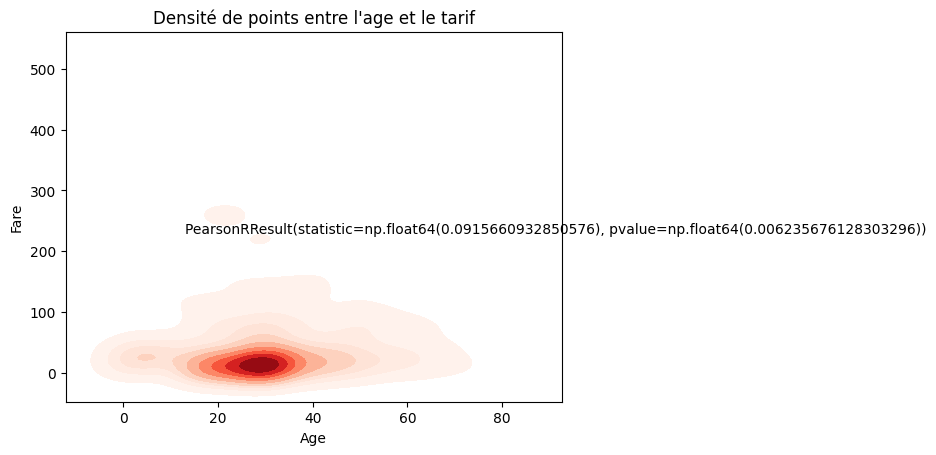

In [14]:
# Densité de points 2D entre les variables 'Age' et 'Fare'
sns.kdeplot(x="Age", y="Fare", cmap="Reds", shade=True, data=df)

plt.annotate(text=stats.pearsonr(df["Age"], df["Fare"]), xy=(13,230))

plt.title("Densité de points entre l'age et le tarif")
plt.show()

- Noyau principal : Jeunes adultes (20-40 ans) payant des tarifs moyens (20-50£)

- Queue de distribution : Quelques outliers avec tarifs >200£ à différents âges

- Zone vide : Peu de passagers âgés (>60 ans) quel que soit le tarif

L'analyse révèle une corrélation significative mais faible (r=0.09) entre l'âge et le tarif, indiquant que l'âge explique à lui seul moins de 1% de la variation des prix (r²=0.008). La densité des points montre que cette relation n'est pas linéaire, mais se concentre principalement dans certaines tranches d'âge (20-40 ans) avec des tarifs généralement inférieurs à 100£. Les valeurs extrêmes (>200£) apparaissent quant à elles distribuées de manière aléatoire across all âges, suggérant qu'elles dépendent d'autres facteurs comme la classe ou le statut social plutôt que de l'âge.